# Homework 5

**Due: 10/22/2020 on gradescope**

## References

+ Lectures 13-16 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

**Note**: Please match all the pages corresponding to each of the questions when you submit on gradescope. 

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context('paper')
sns.set_style('white')
sns.set()
import scipy.stats as st
# A helper function for downloading files
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

# Problem 1 - 

First, make sure that [this](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/hw_05_p1_data.txt) dataset is visible from this Jupyter notebook.
You may achieve this by either:

+ Downloading the data file, putting it in your Google drive, mounting the drive, and changing to the directory of the file (see Problem 0 in [Homework](https://colab.research.google.com/github/PredictiveScienceLab/data-analytics-se/blob/master/homework/homework_03.ipynb); or
+ Downloading the file to the working directory of this notebook with this code:

In [ ]:
url = 'https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/hw_05_p1_data.txt'
download(url)

It's up to you what you choose to do.
If the file is in the right place, the following code should work:

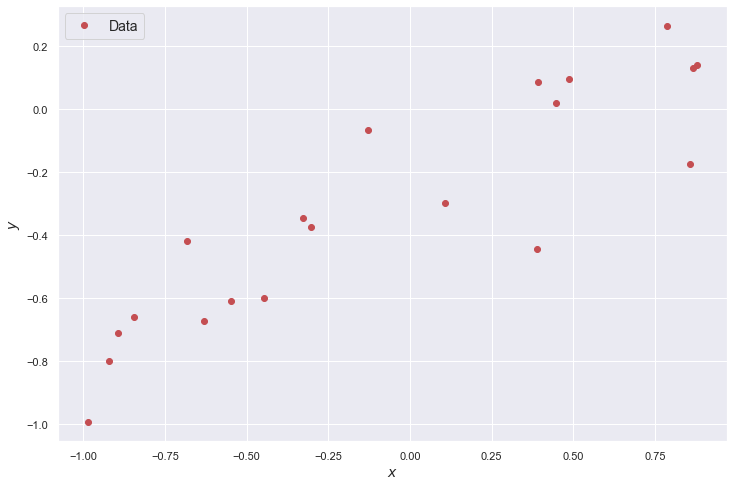

In [4]:
data =  np.loadtxt('hw_05_p1_data.txt')
X = data[0, :]
Y = data[1, :]
plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'ro', label = 'Data')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(loc='best', fontsize = 14);

# Problem 5

### Bayesian linear regression  (Part 2)

We will now look at a somewhat more complicated example. The following dataset was generated using a molecular dynamics simulation of a plastic material (thanks to [Professor Alejandro Strachan](https://engineering.purdue.edu/MSE/people/ptProfile?id=33239) for sharing the data!).
In particular, we took a rectangular chunk of the material and we started applying tensile forces along one dimension.
What you see in the data set below is the instantaneous measurements of *strain* (percent enlogation of the material in the pulling direction) vs the normal *stress* (force per square area in MPa = $10^6 \text{N}/m^2$).
This [video](https://youtu.be/K6vOkQ5F9r0) will help you understand how the dataset was generated.

Text(0, 0.5, 'Stress $\\sigma$')

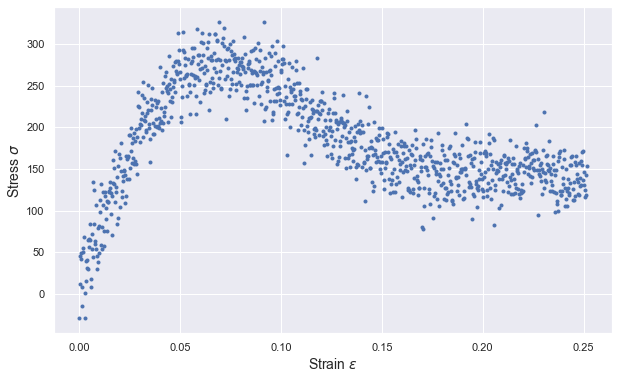

In [23]:
data = np.loadtxt('stress_strain.txt')
epsilon = data[:, 0]
sigma = data[:, 1]
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(epsilon, sigma, '.')
ax.set_xlabel('Strain $\epsilon$', fontsize = 14)
ax.set_ylabel('Stress $\sigma$', fontsize = 14)

This is a noisy dataset.
We would like to process it in order to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve characterizes the type of the material (the chemical bonds, the crystaline structure, any defects, etc.).
It is a required input to the equations of [elasticity](https://en.wikipedia.org/wiki/Elasticity_(physics)) otherwise known as a *constitutive relation*.

### Part A
The very first part of the stress-strain curve is very close to being linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:
$$
\sigma(\epsilon) = E\epsilon.
$$
The constant $E$ is known as the *Young modulus* of the material.
Use a generalized linear model and Bayesian linear regression to:
+ Compute the posterior of $E$ given the data;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve in the elastic regime;
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

In [24]:
# enter code here.

### Part B
Now, come up with a generalized linear model that can capture the non-linear part of the stress-strain relation.
Remember, you can use any model you want as soon as:
+ it is linear in the parameters to be estimated,
+ it clearly has a well-defined elastic regime (see Part A).

Use your model to:
+ Derive, compute, and visualize a probabilistic estimate of the peak of the stress-strain curve (the so-called *yield stress*). This is not necessarily going to be Gaussian or even analytically available;
+ Visualize your epistemic and aleatory uncertainty about the stress-strain curve.
+ Take five plaussible samples of the linear stress-strain curve and visualize them.

In your answer, you should first clearly describe your model in text using the notation of the lectures and then code the solution.

*Hint: You can use the Heavide step function to turn on or off models for various ranges of $\epsilon$. The idea is quite simple. Here is a model that has the right form in the elastic regime and an arbitrary form in the non-linear regime:*
$$
f(\epsilon) = E\epsilon \left[(1 - H(\epsilon - \epsilon_l)\right] + g(\epsilon;\mathbf{w}_g)H(\epsilon - \epsilon_l),
$$
where
$$
H(x) = \begin{cases}
0,\;\text{if}\;x < 0\\
1,\;\text{otherwise}.
\end{cases}
$$

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

### Part C

The model you constructed in part B may have a disctontinuity at $\epsilon=\epsilon_l$.
How can you enforce continuity of $\sigma(\epsilon)$ and its first derivative at that point?
Can you reparameterize the model of part B, so that this condition is automatically satisfied?
If yes, then repeat the analysis of part B.

*Enter your model description/solution here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

In [25]:
# Enter your code here

-End-